Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


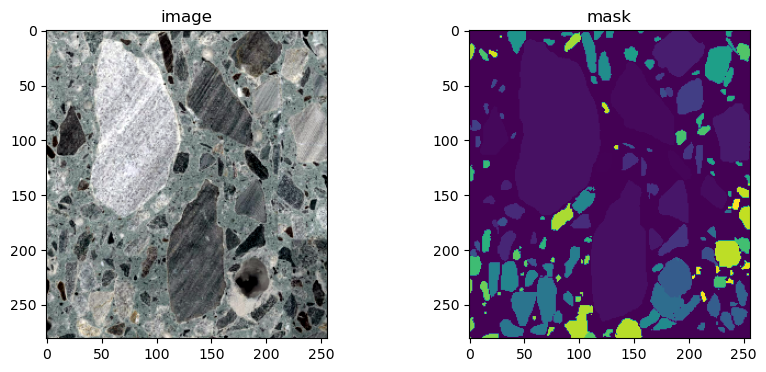

In [3]:
from cProfile import label
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
from sympy import im
from tnia.plotting.plt_helper import imshow_multi2d
import napari
import numpy as np
from csbdeep.utils import normalize

tnia_images_path = Path(r'D:/images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2024_03_19_aggregate_in_concrete')
label_path = Path(parent_path / r'labels')
image_path = Path(label_path / r'input0')
mask_path = Path(label_path / r'ground truth0')
patch_path = Path(parent_path / r'patches')

image_files = list(image_path.glob('*'))
mask_files = list(mask_path.glob('*'))
print(len(image_files))

images=[]
masks=[]

for i in range(len(image_files)):
    image = imread(str(image_path / (image_files[i].name)))
    image = normalize(image, 1, 99.8, axis=(0, 1))
    image = image.astype(np.float32)
    
    mask = imread(str(mask_path / (mask_files[i].name)))
    mask = mask.astype(np.uint16)
    
    images.append(image)
    masks.append(mask)
    
    fig = imshow_multi2d([image, mask], ["image", "mask"], 1, 2)


In [5]:
from tnia.deeplearning.augmentation import uber_augmenter
import os

if not os.path.exists(patch_path):
    os.mkdir(patch_path)
axes = 'YX'
sub_sample = 1

for i in range(len(image_files)):
    uber_augmenter(images[i], masks[i], patch_path, 'concrete', 256, 363, do_random_sized_crop=True, do_random_gamma=True, do_color_jitter=True, do_elastic_transform=False)



c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:228: UserWarning: D:\images\tnia-python-images\imagesc\2024_03_19_aggregate_in_concrete\patches\ground truth0/concrete_0.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:228: UserWarning: D:\images\tnia-python-images\imagesc\2024_03_19_aggregate_in_concrete\patches\ground truth0/concrete_1.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:228: UserWarning: D:\images\tnia-python-images\imagesc\2024_03_19_aggregate_in_concrete\patches\ground truth0/concrete_2.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:228: UserWarning: D:\images\tnia-python-images\imagesc\2024_03_19_aggregate_in_concrete\patches\ground truth0/concrete_3.tif is a